In [1]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train = train_data.flow_from_directory(r'C:\Users\Parth Suthar\Desktop\CT604E-N Machine Learning\Datasets\dogcat\training_set\training_set', batch_size = 64, target_size = (64,64), class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [10]:
test_data = ImageDataGenerator(rescale = 1./255)
test = test_data.flow_from_directory(r'C:\Users\Parth Suthar\Desktop\CT604E-N Machine Learning\Datasets\dogcat\test_set\test_set', batch_size = 64, target_size = (64,64), class_mode = 'binary')

Found 2023 images belonging to 2 classes.


In [12]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=[64,64,3]))
    model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
    
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
    
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))        
    model.add(Dense(1, activation='sigmoid')) # accuracy with softmax was constant 0.5003
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [13]:
model = baseline_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

In [14]:
model_log = model.fit(x = train, epochs=25, verbose=1, validation_data=test)

Epoch 1/25
126/126 [==============================] - 74s 586ms/step - loss: 0.6711 - accuracy: 0.5859 - val_loss: 0.6224 - val_accuracy: 0.6881
Epoch 2/25
126/126 [==============================] - 75s 594ms/step - loss: 0.5872 - accuracy: 0.6909 - val_loss: 0.5590 - val_accuracy: 0.7232
Epoch 3/25
126/126 [==============================] - 76s 599ms/step - loss: 0.5356 - accuracy: 0.7342 - val_loss: 0.5153 - val_accuracy: 0.7484
Epoch 4/25
126/126 [==============================] - 74s 588ms/step - loss: 0.5143 - accuracy: 0.7429 - val_loss: 0.5209 - val_accuracy: 0.7444
Epoch 5/25
126/126 [==============================] - 75s 591ms/step - loss: 0.4966 - accuracy: 0.7564 - val_loss: 0.4949 - val_accuracy: 0.7672
Epoch 6/25
126/126 [==============================] - 75s 597ms/step - loss: 0.4817 - accuracy: 0.7681 - val_loss: 0.4836 - val_accuracy: 0.7696
Epoch 7/25
126/126 [==============================] - 75s 592ms/step - loss: 0.4653 - accuracy: 0.7794 - val_loss: 0.4600 - val_ac

In [16]:
train.class_indices

{'cats': 0, 'dogs': 1}

In [17]:
from keras.preprocessing import image

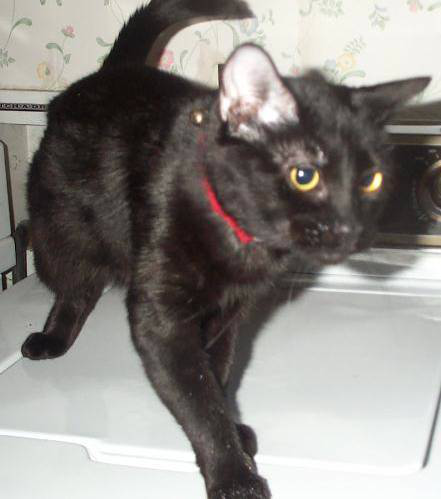

In [18]:
image.load_img(r'C:\Users\Parth Suthar\Desktop\CT604E-N Machine Learning\Datasets\dogcat\test_set\test_set\cats\cat.4492.jpg')

In [22]:
test_img = image.load_img(r'C:\Users\Parth Suthar\Desktop\CT604E-N Machine Learning\Datasets\dogcat\test_set\test_set\cats\cat.4492.jpg', target_size = (64,64))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

dog


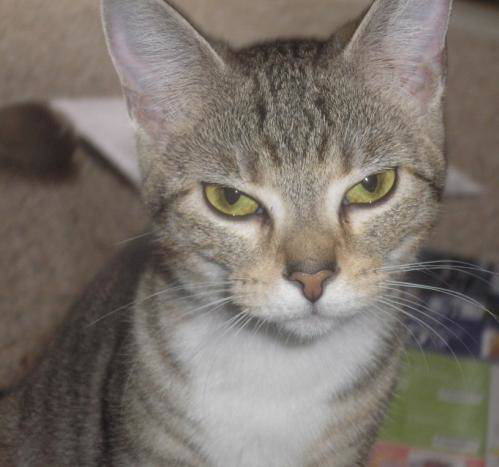

In [37]:
image.load_img(r'C:\Users\Parth Suthar\Desktop\CT604E-N Machine Learning\Datasets\dogcat\test_set\test_set\cats\cat.4180.jpg')

In [38]:
test_img = image.load_img(r'C:\Users\Parth Suthar\Desktop\CT604E-N Machine Learning\Datasets\dogcat\test_set\test_set\cats\cat.4180.jpg', target_size = (64,64))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

cat


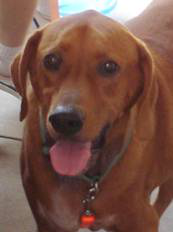

In [28]:
image.load_img(r'C:\Users\Parth Suthar\Desktop\CT604E-N Machine Learning\Datasets\dogcat\test_set\test_set\dogs\dog.4014.jpg')

In [25]:
test_img = image.load_img(r'C:\Users\Parth Suthar\Desktop\CT604E-N Machine Learning\Datasets\dogcat\test_set\test_set\dogs\dog.4014.jpg', target_size = (64,64))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

dog
